<a href="https://colab.research.google.com/github/yuleidner/DAV-6150/blob/main/M3_assn_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id='Top'></a>
# Data Science: Module 3
### M3 Practical Challenge: Cleaning a Messy Data Set
#### Alan Leidner working with Jacob Goodman Sep 20, 2021
Assignment: https://yu.instructure.com/courses/50398/assignments/191949?module_item_id=704962

## Introduction
This notebook will explore and clean a dataset of wine attributes that suffers from a variety of data integrity and usability issues.

1. [Exploratory Data Analysis](#1)
2. [Data Preparation](#2)
3. [Re-analyze Modified Data](#3)
4. [Conclusion](#4)

Using your Pythonskills, perform exploratory data analysis (EDA) on all of the provided data attributes and document your findings. Your EDA writeup should include any insights you are able to derive from your statistical analysis of the attributes and the accompanying exploratory graphics you create(e.g., bar plots, box plots, histograms, line plots, etc.). It is up to you as the data science practitioner to decide how you go about your EDA, including selecting appropriate statistical metrics to be calculated + which types of exploratory graphics to make use of. You should also identify any and all potential data integrity issues (e.g., missing data values; invalid data values; etc.)as well as data distribution issues (e.g., severe skew that can potentially impede the training/performance of a machinelearning model)and, based on your analysis, determine whether any data attributes might need to be transformed prior to being used within a machine learning model. Your goal should be to provide an EDA that is thorough and succinct without it being so detailed that a reader will lose interest in it. 

## Exploratory Data Analysis <a id='1'></a>
The dataset was loaded into the DAV 6150 Github Repository here: https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M3/M3_Data.csv. This notebook will now load the table into a Pandas dataframe for analysis.

In [1]:
# load the pandas library
import pandas as pd

# load the train_test_split function from the sklearn.model_selection module
from sklearn.model_selection import train_test_split

# read a set of sample data from github. It contains information related to cars and insurance
filename = "https://raw.githubusercontent.com/yuleidner/DAV-6150/main/M3/M3_Data.csv"
df = pd.read_csv(filename)
pd.set_option('display.max_columns', None) #expands df to display all columns
df.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


|Data Set Attribute | Description |
|INDEX | Unique ID |
|TARGET |Response Variable (indicates # of cases of wine sold)|
|AcidIndex |Measures total acidity of wine via a weighted average|
|Alcohol| Alcohol Content|
|Chlorides| Chloride content of the wine|
|CitricAcid| Citric Acid content of the wine|
|Density | Density of the wine|
|FixedAcidity| FixedAcidity of the wine|
|FreeSulfurDioxide| Sulfur Dioxide content of the wine|
|LabelAppeal| Subjective marketing score that indicates the appeal of the design of the label on the bottle|
|ResidualSugar| Residual sugar content of the wine|
|STARS| Wine rating as determined by experts (4 = excellent; 1 = Poor)|
|Sulphates| Sulfate content of the wine|
|TotalSulfurDioxideTotal| sulfur dioxide content of the wine|
|VolatileAcidity| Volatile acid content of the wine|
|pH| pH of the wine|

In [2]:
## a few methods will now be called to view summaries of this dataframe
df.shape

(12795, 17)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   INDEX               12795 non-null  int64  
 2   TARGET              12795 non-null  int64  
 3   FixedAcidity        12795 non-null  float64
 4   VolatileAcidity     12795 non-null  float64
 5   CitricAcid          12795 non-null  float64
 6   ResidualSugar       12179 non-null  float64
 7   Chlorides           12157 non-null  float64
 8   FreeSulfurDioxide   12148 non-null  float64
 9   TotalSulfurDioxide  12113 non-null  float64
 10  Density             12795 non-null  float64
 11  pH                  12400 non-null  float64
 12  Sulphates           11585 non-null  float64
 13  Alcohol             12142 non-null  float64
 14  LabelAppeal         12795 non-null  int64  
 15  AcidIndex           12795 non-null  int64  
 16  STAR

In [4]:
df.isnull().sum()

Unnamed: 0               0
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

Column by Column EDA

Columns 0&1 can be ignored. Unnamed is an index in the dataset. INDEX functions as the name of the wine in this dataset. They are useful identifiers in different conexts, but provide no predictive data.



In [5]:
#This ingores depreciation warnings, which will make the code more readable
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

###TARGET 
Response Variable (indicates # of cases of wine sold)


Skewness: -0.326378
Kurtosis: -0.876788


count    12795.000000
mean         3.029074
std          1.926368
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          8.000000
Name: TARGET, dtype: float64

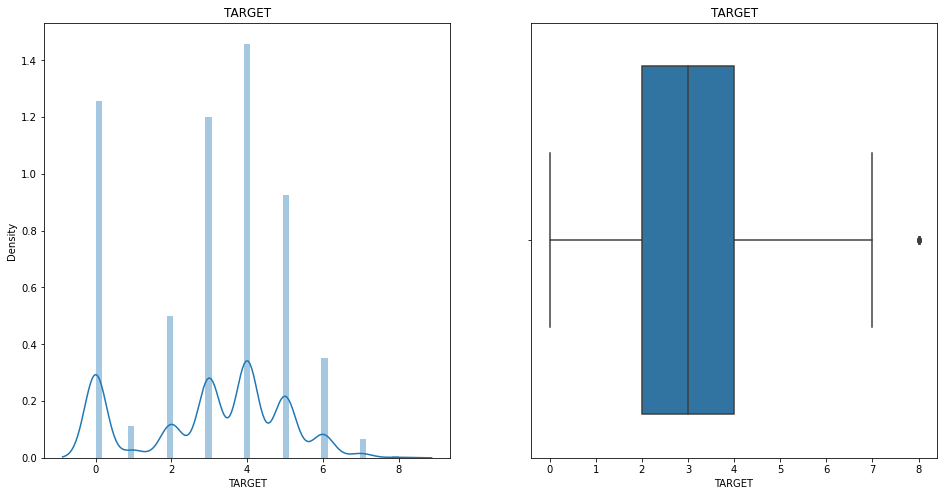

In [6]:
# import pyplot and seaborn for graph creating
import matplotlib.pyplot as plt
import seaborn as sns 

#Create a histogram and boxplot side by side
i= df.TARGET
sns.set_style();
plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('TARGET')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('TARGET');

print("Skewness: %f" %i.skew()) #Adds Skew (symetry)value https://medium.com/@atanudan/kurtosis-skew-function-in-pandas-aa63d72e20de
#· If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
#· If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed
#· If the skewness is less than -1 or greater than 1, the data are highly skewed
print("Kurtosis: %f" %i.kurt(skipna = True)) #Adds Kurtosis value (tail-ness)
#while kurtosis determines the heaviness of the distribution tails.
#Kurtosis > 3 thin and not spread
# Kurtosis <3 moderate spread
i.describe() #Adds summary statistics of the variable

* Modality: Bimodal with peaks around 0 and 4
* Distribution: Left Skewed
* Outliers: One to the right


In [7]:
#checking counts of outlier
df['TARGET'].value_counts()

4    3177
0    2734
3    2611
5    2014
2    1091
6     765
1     244
7     142
8      17
Name: TARGET, dtype: int64

Discussion: It seems like many wines from this datset are not tried, and the rest are normally distributed. Wines ordered 8 times may be an outlier, through it does trail off from wine ordered 7 times. ??SHOULD THIS DATA BE TRANSFORMED??

### FixedAcidity


Skewness: 1.174556


count    12795.000000
mean         8.063251
std          4.996119
min          0.000000
25%          5.600000
50%          7.000000
75%          9.800000
max         34.400000
Name: FixedAcidity, dtype: float64

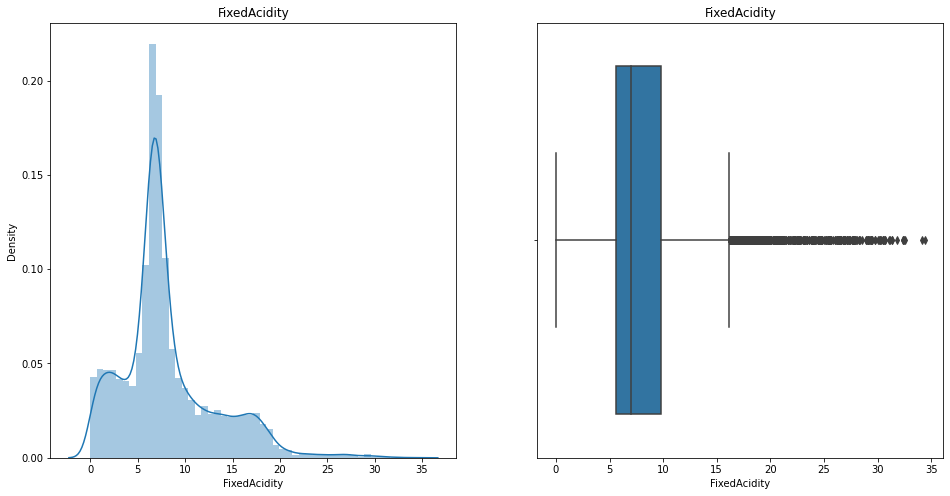

In [8]:
#Create a histogram and boxplot side by side for FixedAcidity
i= df.FixedAcidity

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('FixedAcidity')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('FixedAcidity');
print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

* Modality: Unimodal
* Distribution: right skewed
* Outliers: Many to the right

Discussion:
The frequency of response porportionally decreases with larger values, which may indicate that this is a log distribution. FES page 69

### VolatileAcidity


Skewness: 1.653366


count    12795.000000
mean         0.641086
std          0.555614
min          0.000000
25%          0.250000
50%          0.410000
75%          0.910000
max          3.680000
Name: VolatileAcidity, dtype: float64

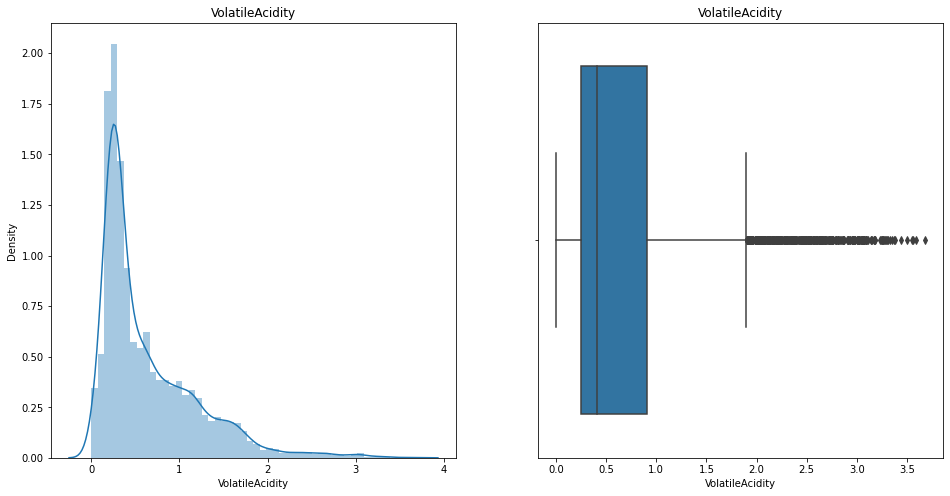

In [9]:
#Create a histogram and boxplot side by side for VolatileAcidity
i= df.VolatileAcidity
plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)

#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('VolatileAcidity')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('VolatileAcidity');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

VolatileAcidity is a continuous variable with no missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion
The frequency of response porportionally decreases with larger values, which may indicate that this is a log distribution. FES page 69

### CitricAcid

Skewness: 1.643195


count    12795.000000
mean         0.686315
std          0.606005
min          0.000000
25%          0.280000
50%          0.440000
75%          0.970000
max          3.860000
Name: CitricAcid, dtype: float64

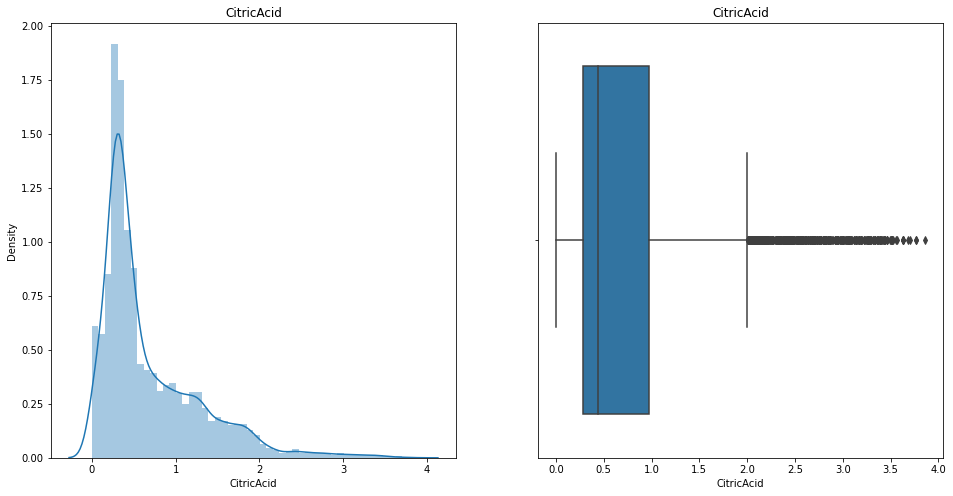

In [10]:
#Create a histogram and boxplot side by side for CitricAcid
i= df.CitricAcid

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)

#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('CitricAcid')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('CitricAcid');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

CitricAcid is a continuous variable with no missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion:

The frequency of response porportionally decreases with larger values, which may indicate that this is a log distribution. FES page 69

### ResidualSugar


Skewness: 1.469162


count    12179.000000
mean        23.367809
std         24.945667
min          0.000000
25%          3.600000
50%         12.900000
75%         38.700000
max        141.150000
Name: ResidualSugar, dtype: float64

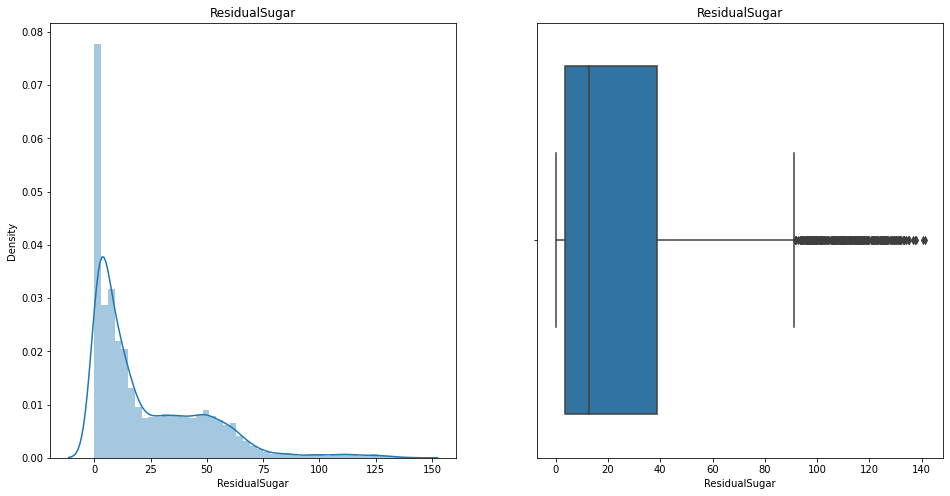

In [11]:
#Create a histogram and boxplot side by side for ResidualSugar
i= df.ResidualSugar

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('ResidualSugar')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('ResidualSugar');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable


ResidualSugar is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion

??NULL DATA??

The frequency of response porportionally decreases with larger values, which may indicate that this is a log distribution. FES page 69


### Chlorides


Skewness: 1.481147


count    12157.000000
mean         0.222559
std          0.234288
min          0.000000
25%          0.046000
50%          0.098000
75%          0.368000
max          1.351000
Name: Chlorides, dtype: float64

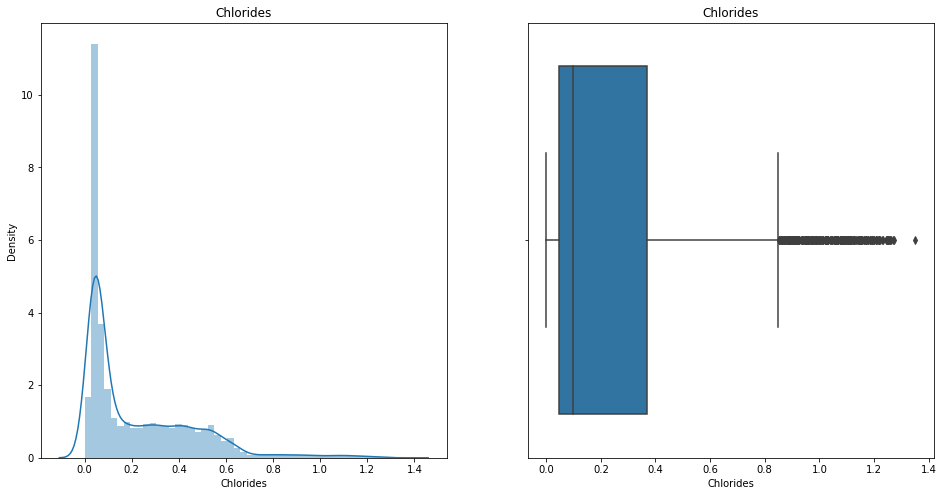

In [12]:
#Create a histogram and boxplot side by side for Chlorides
i= df.Chlorides

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('Chlorides')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('Chlorides');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Chlorides is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion

??NULL DATA??

The frequency of response porportionally decreases with larger values, which may indicate that this is a log distribution. FES page 69

### FreeSulfurDioxide

Skewness: 1.530134


count    12148.000000
mean       106.679042
std        108.102694
min          0.000000
25%         28.000000
50%         56.000000
75%        172.000000
max        623.000000
Name: FreeSulfurDioxide, dtype: float64

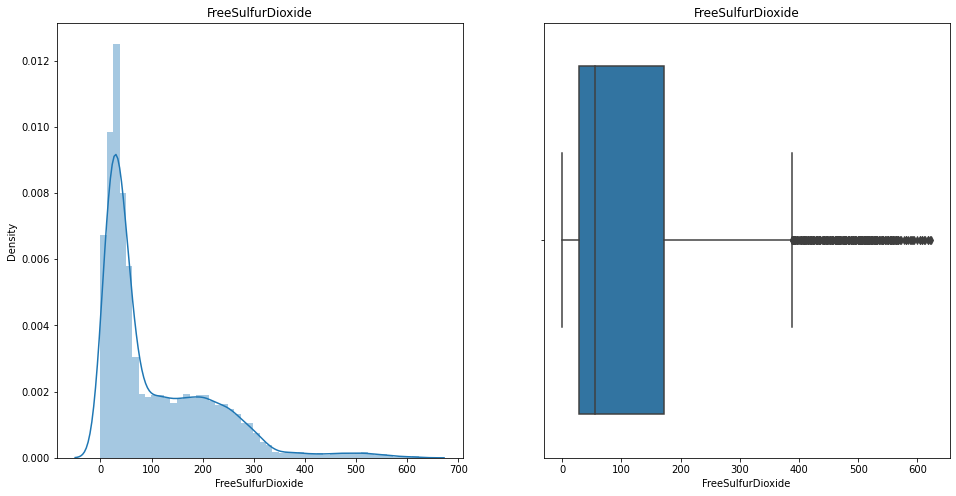

In [13]:
#Create a histogram and boxplot side by side for FreeSulfurDioxide
i= df.FreeSulfurDioxide

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('FreeSulfurDioxide')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('FreeSulfurDioxide');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

FreeSulfurDioxide is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion

??NULL DATA??

The frequency of response porportionally decreases with larger values, which may indicate that this is a log distribution. FES page 69


### TotalSulfurDioxide

Skewness: 1.611275


count    12113.000000
mean       204.319120
std        163.116881
min          0.000000
25%        100.000000
50%        154.000000
75%        262.000000
max       1057.000000
Name: TotalSulfurDioxide, dtype: float64

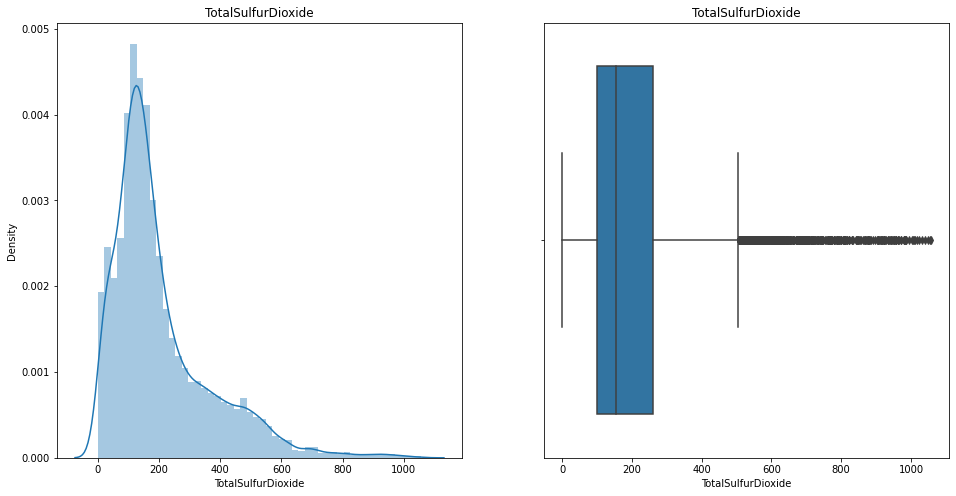

In [14]:
#Create a histogram and boxplot side by side for TotalSulfurDioxide
i= df.TotalSulfurDioxide

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('TotalSulfurDioxide')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('TotalSulfurDioxide');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

TotalSulfurDioxide is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion

??NULL DATA??

The frequency of response porportionally decreases with larger values, which may indicate that this is a log distribution. FES page 69

 ###  Density


Skewness: -0.018698


count    12795.000000
mean         0.994203
std          0.026538
min          0.888090
25%          0.987720
50%          0.994490
75%          1.000515
max          1.099240
Name: Density, dtype: float64

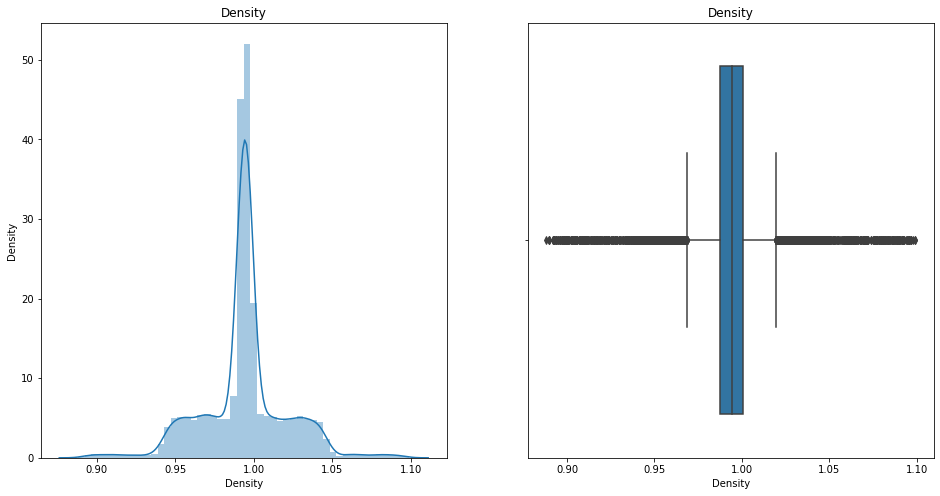

In [15]:
#Create a histogram and boxplot side by side for Density
i= df.Density

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('Density')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('Density');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Density is a continuous variable with no missing values
* Modality: Unimodal
* Distribution: Centered
* Outliers: many on both sides

Discussion

??NULL DATA??

??OUTLIERS??


### pH

Skewness: 0.044299


count    12400.000000
mean         3.207628
std          0.679687
min          0.480000
25%          2.960000
50%          3.200000
75%          3.470000
max          6.130000
Name: pH, dtype: float64

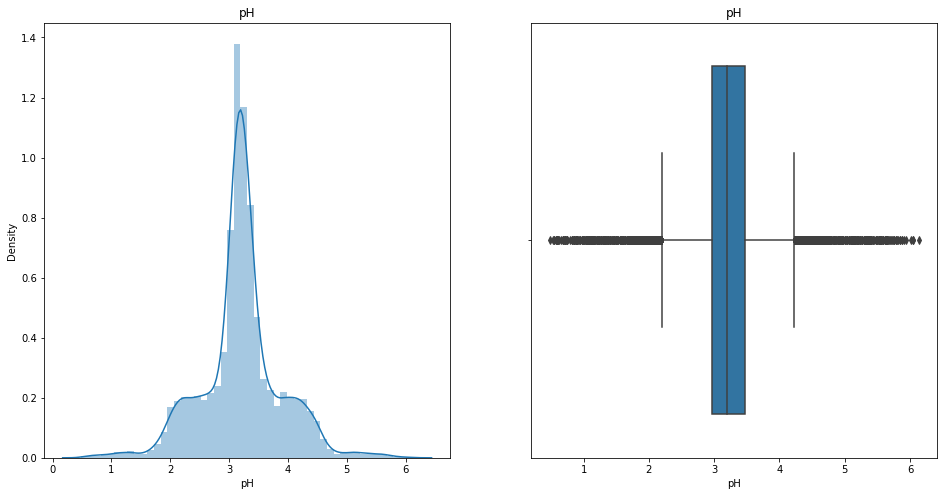

In [16]:
#Create a histogram and boxplot side by side for pH
i= df.pH

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('pH')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('pH');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

pH is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: Centered
* Outliers: some missing values

Discussion

??OUTLIERS??

### Sulphates


Skewness: 1.691810


count    11585.000000
mean         0.846668
std          0.655612
min          0.000000
25%          0.430000
50%          0.590000
75%          1.100000
max          4.240000
Name: Sulphates, dtype: float64

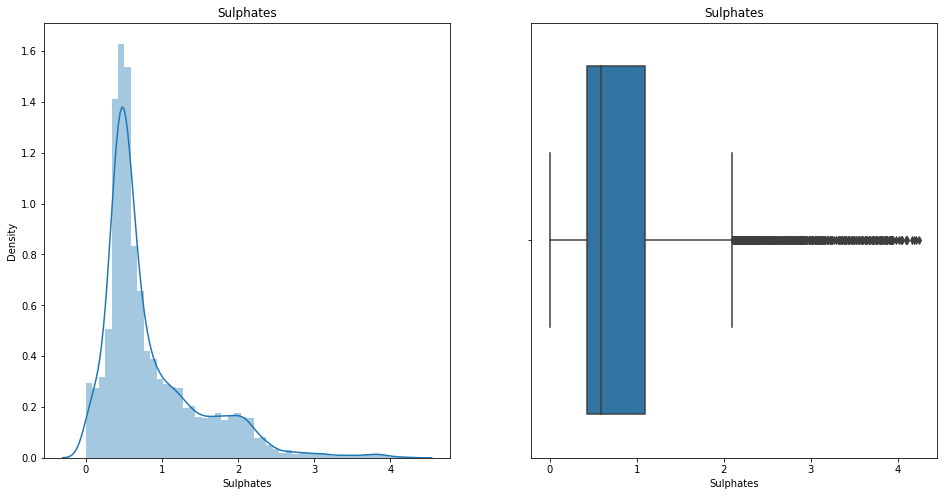

In [17]:
#Create a histogram and boxplot side by side for Sulphates
i= df.Sulphates

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('Sulphates')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('Sulphates');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Sulphates is a continuous variable with many missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: many to the right

Discussion
??NULL??

### Alcohol

Skewness: 0.182591


count    12142.000000
mean        10.523778
std          3.629154
min          0.000000
25%          9.000000
50%         10.400000
75%         12.400000
max         26.500000
Name: Alcohol, dtype: float64

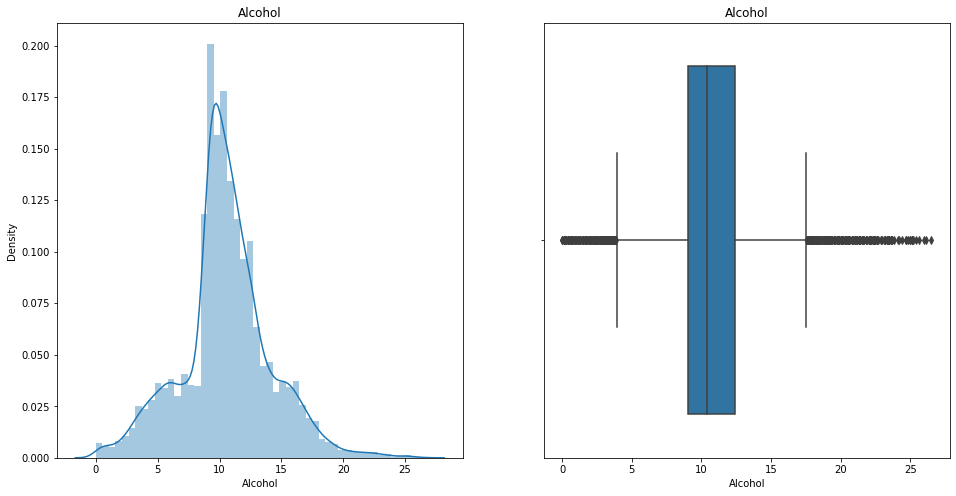

In [18]:
#Create a histogram and boxplot side by side for Alcohol
i= df.Alcohol

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('Alcohol')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('Alcohol');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Alchohol is a continuous variable with some missing values
* Modality: Unimodal
* Distribution: Centered
* Outliers: many on both sides

Discussion
??NULL??


### LabelAppeal


Skewness: 0.008431


count    12795.000000
mean        -0.009066
std          0.891089
min         -2.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: LabelAppeal, dtype: float64

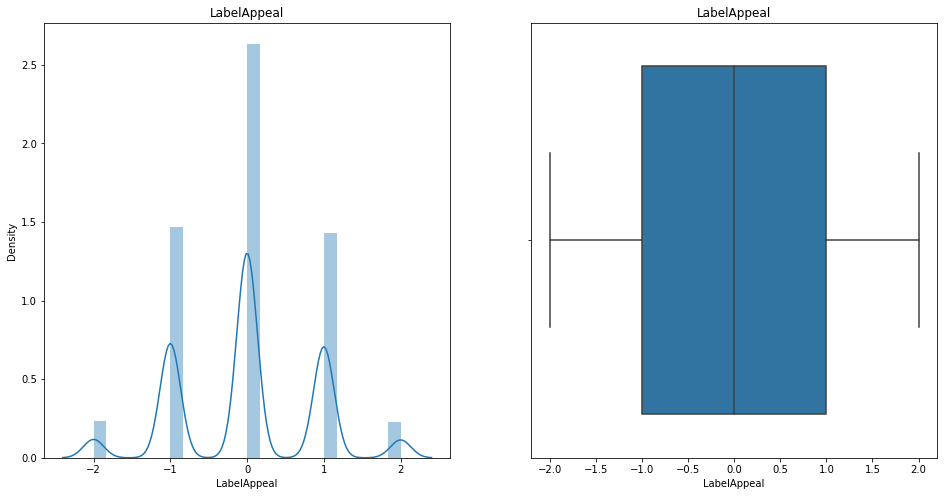

In [19]:
#Create a histogram and boxplot side by side for LabelAppeal
i= df.LabelAppeal

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('LabelAppeal')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('LabelAppeal');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

LabelAppeal is a actegroical variable with no missing values
* Modality: Unimodal
* Distribution: Centered
* Outliers: None

Discussion \\
No changes necessary


### AcidIndex

Skewness: 1.648883


count    12795.000000
mean         7.772724
std          1.323926
min          4.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         17.000000
Name: AcidIndex, dtype: float64

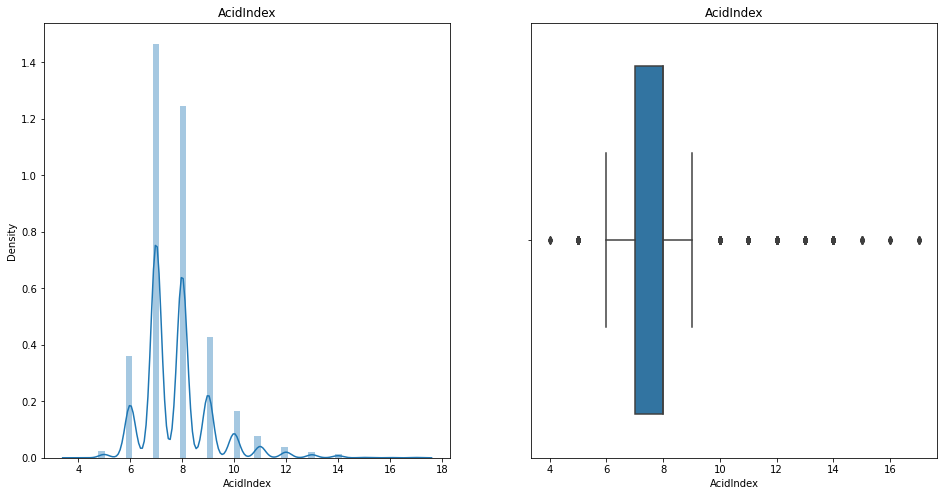

In [20]:
#Create a histogram and boxplot side by side for AcidIndex
i= df.AcidIndex

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('AcidIndex')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('AcidIndex');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

LabelAppeal is a actegroical variable with no missing values
* Modality: Unimodal
* Distribution: Right Skewed
* Outliers: Some on both sides, more to the right

Discussion


### STARS

Skewness: 0.447378


count    9436.000000
mean        2.041755
std         0.902540
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: STARS, dtype: float64

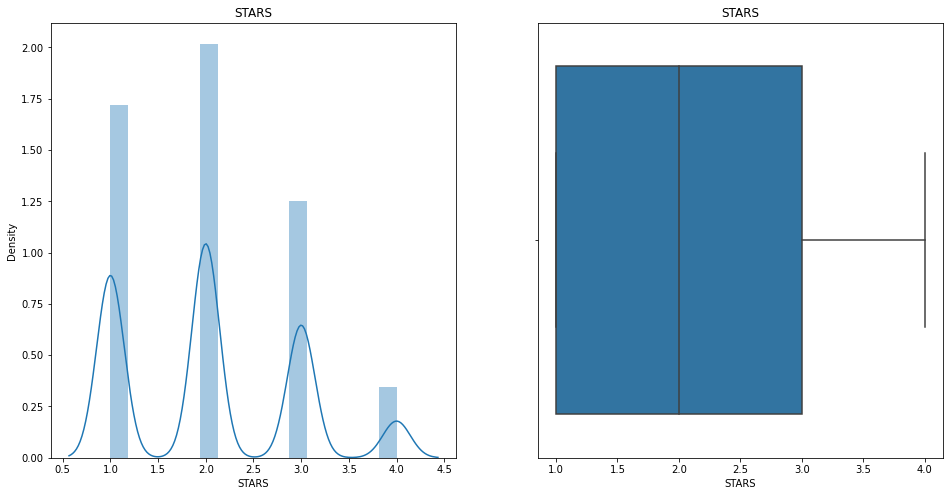

In [21]:
#Create a histogram and boxplot side by side for STARS
i= df.STARS

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('STARS')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('STARS');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

STARS is a categorical variable with many missing values
* Modality: Unimodal
* Distribution: right skewed
* Outliers: None

Discussion:

Maybe we can assume all missing values are 0 stars? see how that affects correlation and skewness etc

Correlation Analysis

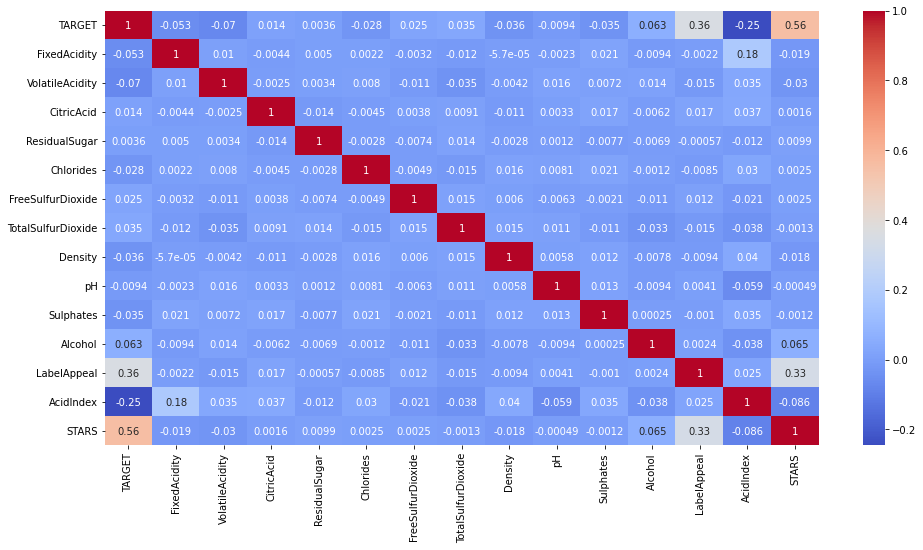

In [22]:
dfc = df.iloc[:, 2:]
plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
sns.heatmap(dfc.corr(),cmap='coolwarm',annot=True)

## Data Preparation <a id='2'></a>
1. handle nulls or bad data: have you deleted any observations? Used imputation to fill missing data values?
 * svd or other model based approach?

2. dummy variables or other categoryial transofrmations
3. Transform
 1. interaction features
 2. handle sparse classes
 3. drop features
  * colinear features 
  * drop none helpful features
  

In [23]:
#create a dataframe to easily view missing values
df_null = df[df.columns[~df.notnull().all()]]
df_null.describe()

,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,pH,Sulphates,Alcohol,STARS
count,12179.000000,12157.000000,12148.000000,12113.000000,12400.000000,11585.000000,12142.000000,9436.000000
mean,23.367809,0.222559,106.679042,204.319120,3.207628,0.846668,10.523778,2.041755
std,24.945667,0.234288,108.102694,163.116881,0.679687,0.655612,3.629154,0.902540
min,0.000000,0.000000,0.000000,0.000000,0.480000,0.000000,0.000000,1.000000
25%,3.600000,0.046000,28.000000,100.000000,2.960000,0.430000,9.000000,1.000000
50%,12.900000,0.098000,56.000000,154.000000,3.200000,0.590000,10.400000,2.000000
75%,38.700000,0.368000,172.000000,262.000000,3.470000,1.100000,12.400000,3.000000
max,141.150000,1.351000,623.000000,1057.000000,6.130000,4.240000,26.500000,4.000000


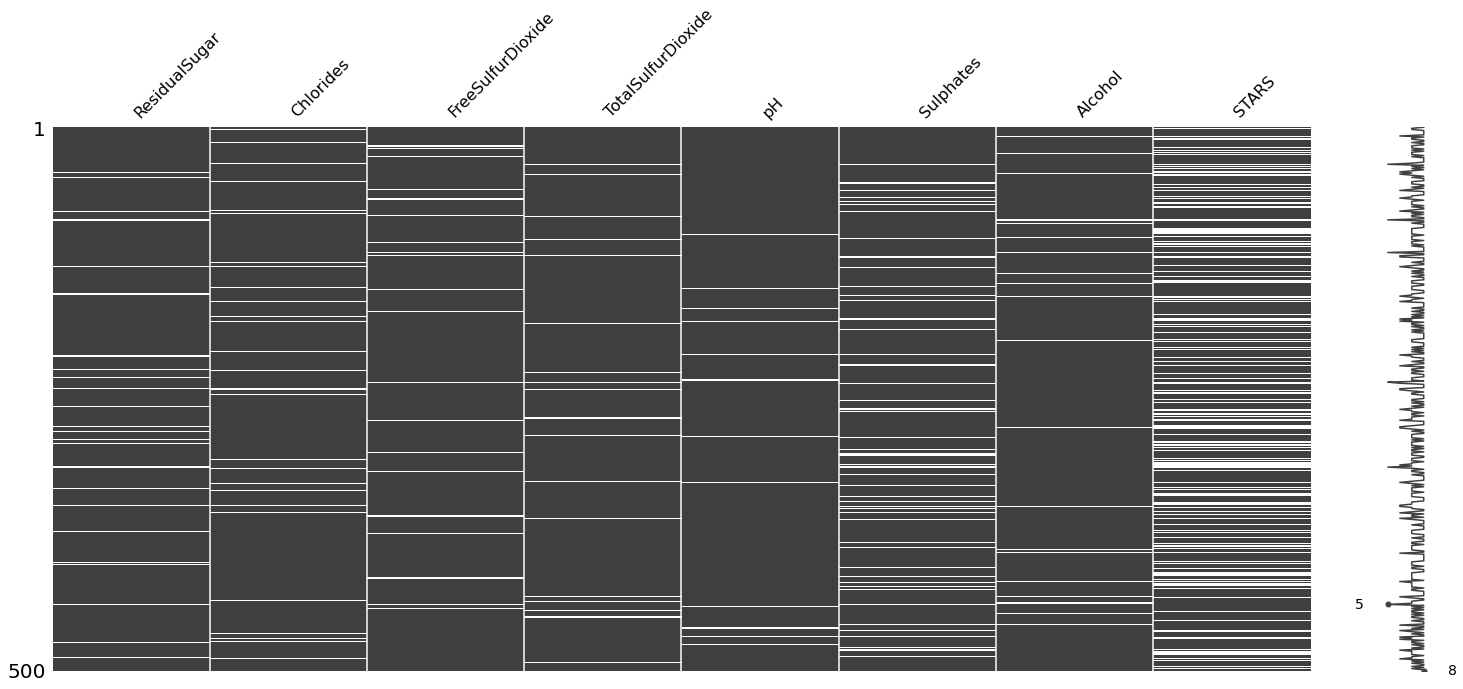

In [24]:
import missingno as msno
ax = msno.matrix(df_null.sample(500))

There dont seem to be any obvious patterns to the missing data

In [25]:
#create a new datafram that we will modify values of, leaving the original in place to compare against
df_prep = df
df_prep.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [26]:
#drop Unnamed local index, it holds no value for us
df_prep.drop(['Unnamed: 0'], axis=1, inplace=True)
df_prep.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [27]:
#percent of missing data
df_null.isnull().mean() * 100

ResidualSugar          4.814381
Chlorides              4.986323
FreeSulfurDioxide      5.056663
TotalSulfurDioxide     5.330207
pH                     3.087143
Sulphates              9.456819
Alcohol                5.103556
STARS                 26.252442
dtype: float64

Skewness: 1.469162


count    12179.000000
mean        23.367809
std         24.945667
min          0.000000
25%          3.600000
50%         12.900000
75%         38.700000
max        141.150000
Name: ResidualSugar, dtype: float64

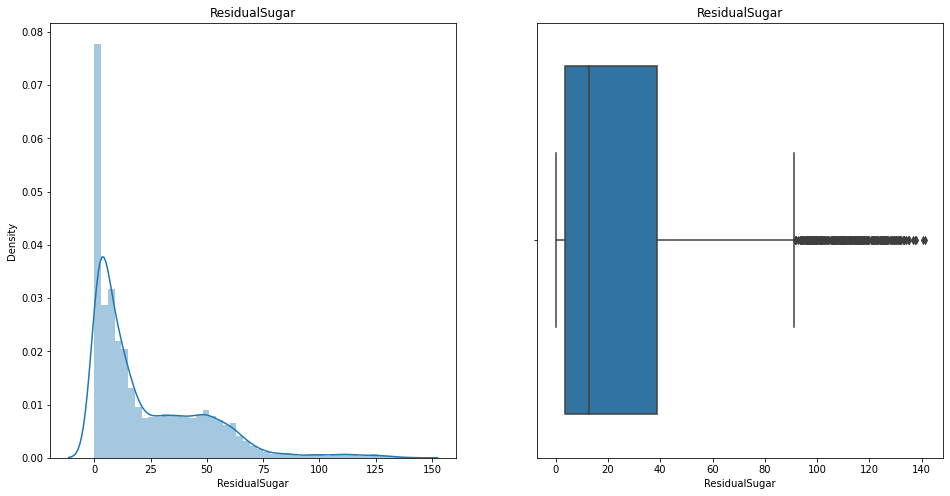

In [28]:
#Create a histogram and boxplot side by side for ResidualSugar
i= df_prep.ResidualSugar

plt.figure(figsize=(16,8))#.suptitle('distributions',fontsize=16)
#Histogram
plt.subplot(1,2,1);
sns.distplot(i); 
plt.title('ResidualSugar')
#Boxplot
plt.subplot(1,2,2);
sns.boxplot(i);
plt.title('ResidualSugar');

print("Skewness: %f" %i.skew()) #Adds Skew value
i.describe() #Adds summary statistics of the variable

Modality: Unimodal \\
Distribution: right skewed \\
Outliers: many to the right \\
Sooooo fill in nullsssss??? but how? \\
I would try KNN, but the notion of distance in this variable is fuzzy, and looking above at the correlation analysis the "closest" variable only explains .0099 of ResidualSugar. I think our best bet here is to use a simple imputer. I believe that due to the skew and tail, ResidualSugar should be transformed by log. Due to that, I want to impute using Median, to preserve the current shape of the histogram



In [107]:
#split response variable from data set
data = df.values #changing this to a numpy array in order to impute later
X = data[:,2:]#all rows, last column
y = data[:,1]


In [108]:
y

array([3., 3., 5., ..., 4., 3., 4.])

In [109]:
# source: https://www.youtube.com/watch?v=m_qKhnaYZlc
#simple imbputer is univariate. knn (most similar rows) and iterative (regression model) imputer are multivariate, so should give better impution
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2)
X_knn = impute_knn.fit_transform(X)

In [102]:
#sanity checks
import numpy as np
'Missing: {}'.format(sum(np.isnan(X).flatten()))

'Missing: 8200'

In [103]:
'Missing: {}'.format(sum(np.isnan(X_knn_trans).flatten()))

'Missing: 0'

# !!?? EVALUATE to See which impute gets best Machine learning results???!!!

In [111]:
# Now split the data into training and testing subsets. 
# set aside 30% of the data for testing purposes, specifying a value for the inital random_state
# to have the ability to reproduce the exact same training + testing subsets repeatedly
X_knn_train, X_knn_test, y_train, y_test = train_test_split(X_knn, y, test_size=0.3, random_state=42)

In [114]:
# load the LinearRegression() function from sklearn's 'linear_model' sub-library
from sklearn.linear_model import LinearRegression

# load the cross_val_score function from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score

# choose the model function you want to use to a variable
model = LinearRegression()

# fit the model using 5-fold cross validation.
scores = cross_val_score(model, X_knn_train, y_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)
print (np.mean(scores))

[0.23146688 0.24391411 0.26574929 0.2073327  0.24938686 0.27625818
 0.24692828 0.25582782 0.26061726 0.29145612]
0.25289374983955565


In [110]:
from sklearn.experimental import enable_iterative_imputer #because it is experimental, it needs to be explicitly enabled
from sklearn.impute import IterativeImputer

impute_it = IterativeImputer()
X_it = impute_it.fit_transform(X)

In [116]:
X_it_train, X_it_test, y_train, y_test = train_test_split(X_it, y, test_size=0.3, random_state=42)
# fit the model using 5-fold cross validation.
scores = cross_val_score(model, X_it_train, y_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)
print (np.mean(scores))

[0.24649255 0.27508786 0.27889794 0.22656265 0.25981977 0.29287428
 0.26417803 0.2786336  0.27062664 0.31144915]
0.2704622455588543


In [117]:
from sklearn.impute import SimpleImputer
imputer_mean = SimpleImputer(missing_values = np.nan, strategy ='mean') #also try median and mode
X_si_mean = imputer_mean.fit_transform(X)

In [118]:
X_si_mean_train, X_si_mean_test, y_train, y_test = train_test_split(X_si_mean, y, test_size=0.3, random_state=42)
# fit the model using 5-fold cross validation.
scores = cross_val_score(model, X_si_mean_train, y_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)
print (np.mean(scores))

[0.25192623 0.26971944 0.27849427 0.2357432  0.2636256  0.29977857
 0.26673553 0.28001267 0.27471649 0.30944933]
0.27302013146421467


In [120]:
imputer_median = SimpleImputer(missing_values = np.nan, strategy ='median') #also try median and mode
X_si_median = imputer_median.fit_transform(X)

In [121]:
X_si_median_train, X_si_median_test, y_train, y_test = train_test_split(X_si_median, y, test_size=0.3, random_state=42)
# fit the model using 10-fold cross validation.
scores = cross_val_score(model, X_si_median_train, y_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)
print (np.mean(scores))

[0.25811457 0.27641052 0.28583475 0.24282868 0.27005194 0.30779811
 0.27421027 0.28674241 0.2816561  0.31587857]
0.2799525914566943


In [124]:
imputer_mode = SimpleImputer(missing_values = np.nan, strategy ='most_frequent') #also try median and mode
X_si_mode = imputer_mode.fit_transform(X)

In [125]:
X_si_mode_train, X_si_mode_test, y_train, y_test = train_test_split(X_si_mode, y, test_size=0.3, random_state=42)
# fit the model using 5-fold cross validation.
scores = cross_val_score(model, X_si_mode_train, y_train, cv=10)

# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print (scores)
print (np.mean(scores))

[0.25802086 0.27639263 0.285786   0.24245978 0.27001115 0.30799526
 0.27402897 0.28647976 0.28167113 0.31570732]
0.27985528634707807


also try adding 0 to all STARS NaN first

In [82]:
#https://towardsdatascience.com/how-to-use-the-simpleimputer-class-in-machine-learning-with-python-10b321c94861
#running into problems because RepeatedStratifiedKFold doesnt work on categorical TARGET
#maybe wont use this pipeline


# !!?? WHAT ABOUT IF I LOG TRANSFORM SOME OF THEM??!!



4. Using your Python skills, perform appropriate data preparation tasks relative to the data integrity + usability issues you identified via your EDA work.Describe the ways in which you have transformed / prepared the data for use within a machine learning algorithm, e.g., have you deleted any observations? Used imputation to fill missing data values? Created any new variables? Transformed data distributions via mathematical transforms (e.g., Box-Cox, logarithms, etc.) or binningto make the data more “usable”for model training? etc. Be sure to explain your justification for each adjustment you have made to the data.

## Re-analyze Modified Data




5. Using Python, re-run your EDA analysis on any variables you have adjusted during Data Preparation and compare / contrast your results to those you saw prior to performing your Data Preparation adjustments. Describe how each of your Data Preparation adjustments have improved the data set for purposes of using it within a machine learning algorithm.

## Conclusion

Your deliverable for this assignmentis your Jupyter Notebook. It should contain a combination of Python code cells and explanatory narratives contained within properly formatted Markdown cells. The Notebook should contain (at a minimum) the following sections (including the relevant Python code for each section):1)Introduction(5Points):  Summarize the problem + explain the steps you plan to take to address the problem2)Exploratory Data Analysis(35Points): Explain + present your EDA work including any conclusions you draw from your analysis regarding the integrity + usability of the data in its raw state. This section should include any Python code used for the EDA3)Data Preparation(45Points): Describe + show the steps you have taken to address the data integrity + usability issues you identified in your EDA. This section should include any Python code used for Data Preparation4)Prepped Data Review(10 Points): Explain + present your post-Data Prep EDA analysis. This section should include any Python code used for re-running your EDA on the variables adjusted during your Data Preparation work.5)Conclusions(5Points) Small groups should identity all group members at the start of the Jupyter Notebook and each team member should submit their own copy of the team’s work within Canvas.